# Uber Data Analysis


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar

In [3]:
uberDS = pd.read_csv('uber.csv')

In [6]:
uberDS.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
uberDS.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [8]:
uberDS=uberDS[:-1]

In [9]:
uberDS.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [11]:
uberDS.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

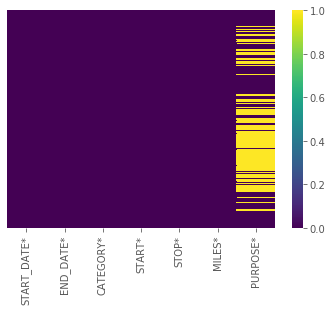

In [14]:
sns.heatmap(uberDS.isnull(),yticklabels=False,cmap="viridis")

In [15]:
uberDS=uberDS.dropna()

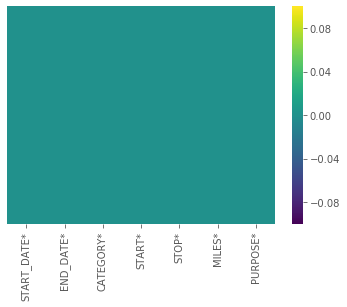

In [16]:
sns.heatmap(uberDS.isnull(),yticklabels=False,cmap="viridis")

In [18]:
uberDS['START_DATE*']=pd.to_datetime(uberDS['START_DATE*'],format="%m/%d/%Y %H:%M")
uberDS['END_DATE*']=pd.to_datetime(uberDS['END_DATE*'],format="%m/%d/%Y %H:%M")

In [19]:
uberDS.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [36]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in uberDS['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

    
uberDS['HOUR']=hour
uberDS['DAY']=day
uberDS['DAY_OF_WEEK']=dayofweek
uberDS['MONTH']=month
uberDS['WEEK_DAY']=weekday
    

In [42]:
time=[]
uberDS["TRAVELLING_TIME"]=uberDS['END_DATE*']-uberDS['START_DATE*']
for i in uberDS["TRAVELLING_TIME"]:
    time.append(i.seconds/60)
uberDS["TRAVELLING_TIME"]=time
uberDS.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEK_DAY,TRAVELLING_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,6.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,67.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,4.0


In [44]:
uberDS['TRAVELLING_TIME']=uberDS['TRAVELLING_TIME']/60
uberDS['SPEED']=uberDS['MILES*']/uberDS['TRAVELLING_TIME']

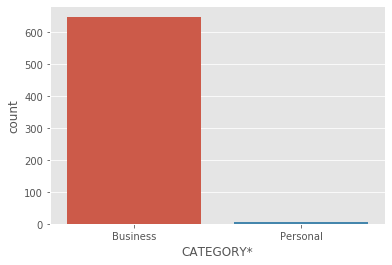

In [46]:
sns.countplot(x="CATEGORY*",data=uberDS)

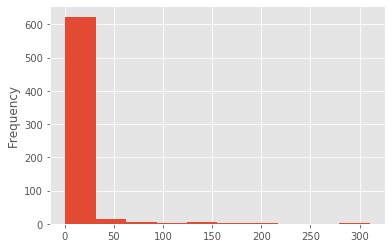

In [47]:
uberDS['MILES*'].plot.hist()

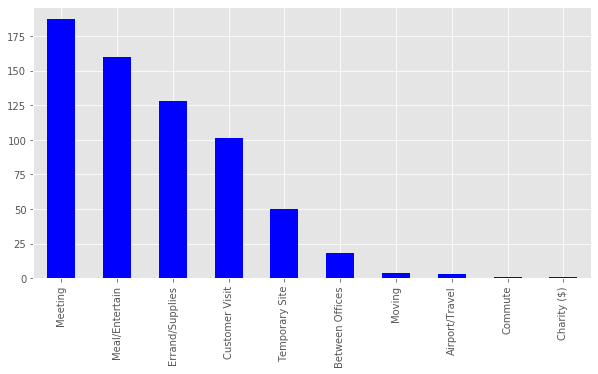

In [48]:
uberDS['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

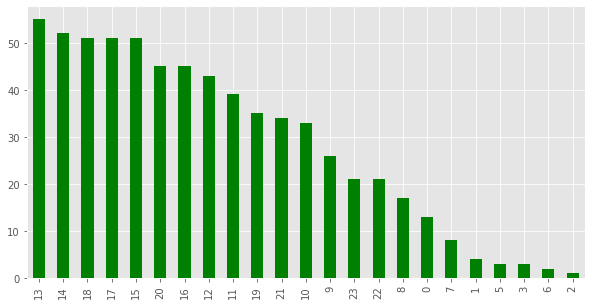

In [49]:
uberDS['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='green')


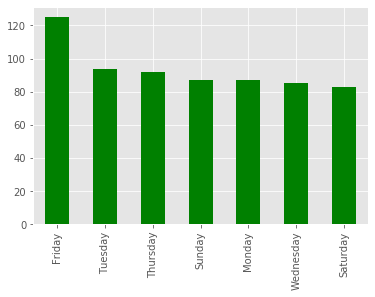

In [51]:
uberDS['WEEK_DAY'].value_counts().plot(kind='bar',color='green')


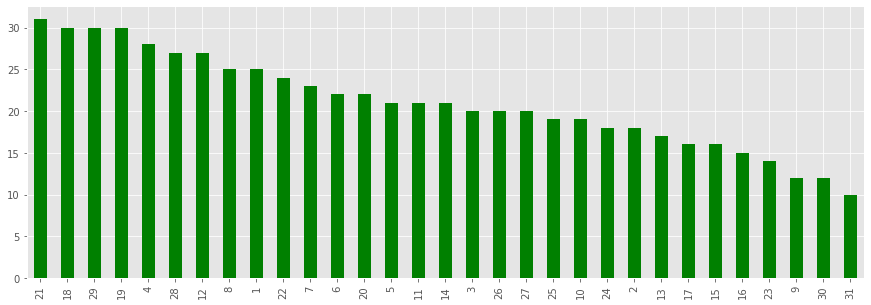

In [52]:
uberDS['DAY'].value_counts().plot(kind='bar',figsize=(15,5),color='green')


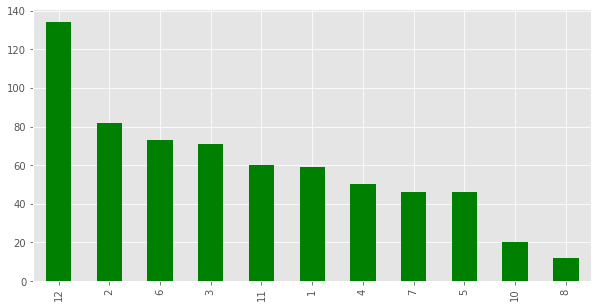

In [53]:
uberDS['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='green')


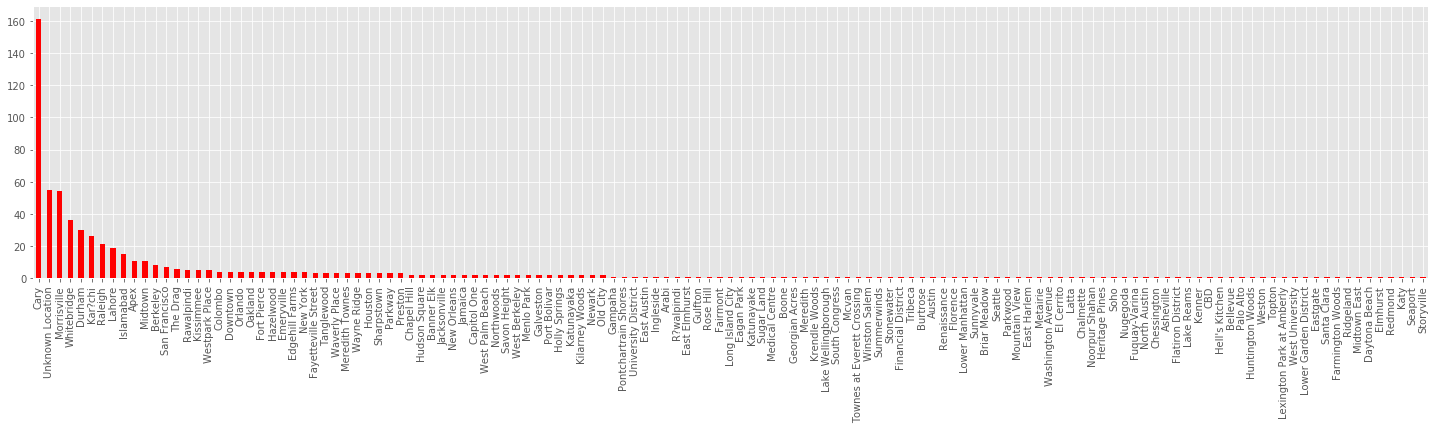

In [54]:
uberDS['START*'].value_counts().plot(kind='bar',figsize=(25,5),color='red')


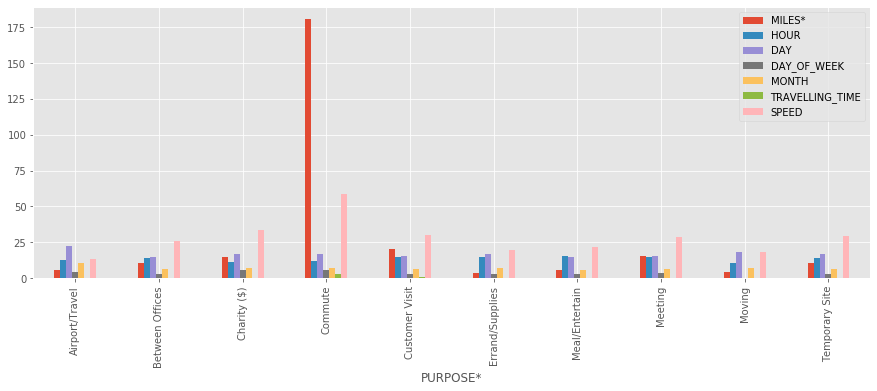

In [55]:
uberDS.groupby('PURPOSE*').mean().plot(kind='bar',figsize=(15,5))
